<a href="https://colab.research.google.com/github/n-prathyusha82/FMML_Assigment/blob/main/FMML_Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

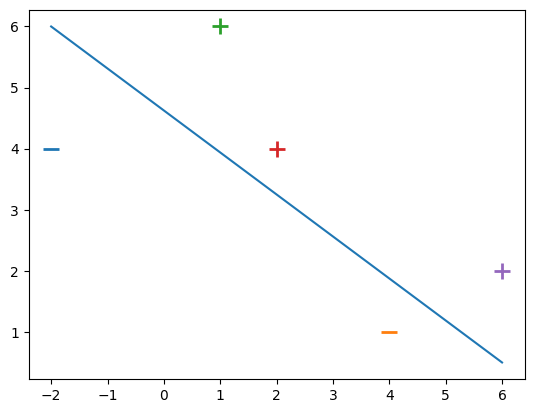

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

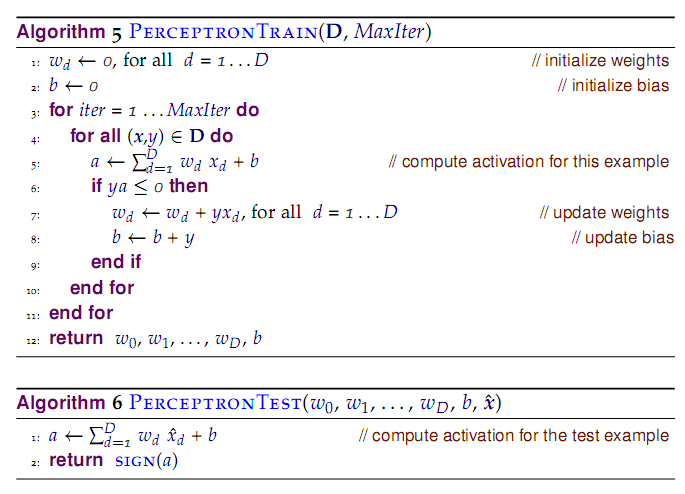

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

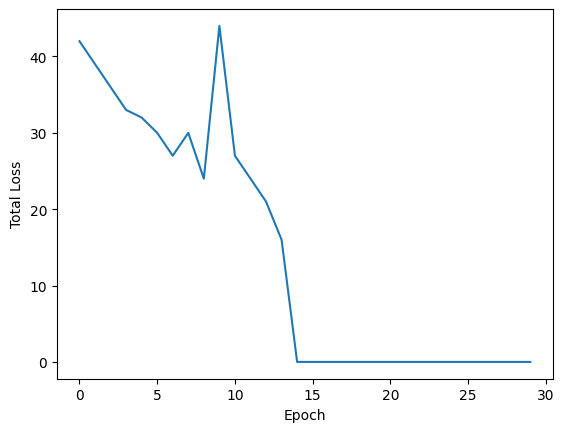

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

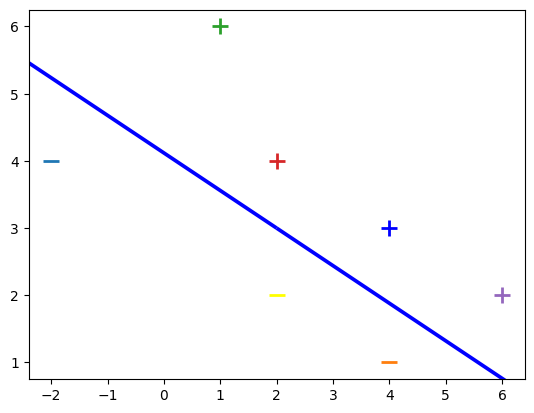

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



**1ANS**

In [13]:
pip install scikit-learn matplotlib pandas


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


   attribute_1  attribute_2  attribute_3  attribute_4  attribute_5  \
0       0.0200       0.0371       0.0428       0.0207       0.0954   
1       0.0453       0.0523       0.0843       0.0689       0.1183   
2       0.0262       0.0582       0.1099       0.1083       0.0974   
3       0.0100       0.0171       0.0623       0.0205       0.0205   
4       0.0762       0.0666       0.0481       0.0394       0.0590   

   attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  ...  \
0       0.0986       0.1539       0.1601       0.3109        0.2111  ...   
1       0.2583       0.2156       0.3481       0.3337        0.2872  ...   
2       0.2280       0.2431       0.3771       0.5598        0.6194  ...   
3       0.0368       0.1098       0.1276       0.0598        0.1264  ...   
4       0.0649       0.1209       0.2467       0.3564        0.4459  ...   

   attribute_52  attribute_53  attribute_54  attribute_55  attribute_56  \
0        0.0027        0.0065        0.0159    

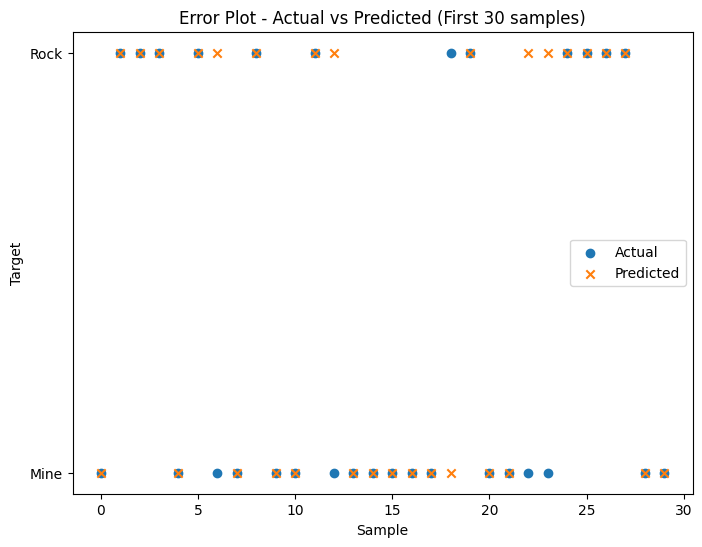

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score

# Load the Sonar dataset from scikit-learn or fetch it online
data = fetch_openml(name='sonar', version=1, as_frame=True)
sonar_df = data.frame

# Display basic information about the dataset
print(sonar_df.head())
print(sonar_df.describe())

# Prepare data for modeling
X = sonar_df.iloc[:, :-1]  # Features
y = sonar_df.iloc[:, -1]   # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plotting error (Actual vs Predicted for the first 30 samples)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test[:30])), y_test[:30], label='Actual', marker='o')
plt.scatter(range(len(y_pred[:30])), y_pred[:30], label='Predicted', marker='x')
plt.xlabel('Sample')
plt.ylabel('Target')
plt.title('Error Plot - Actual vs Predicted (First 30 samples)')
plt.legend()
plt.show()


**2Ans**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score

# Load the Sonar dataset from scikit-learn or fetch it online
data = fetch_openml(name='sonar', version=1, as_frame=True)
sonar_df = data.frame

# Prepare data for modeling
X = sonar_df.iloc[:, :-1]  # Features
y = sonar_df.iloc[:, -1]   # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different max_iter values
max_iter_values = [50, 100, 500, 1000, 2000]

for max_iter in max_iter_values:
    # Train a logistic regression model
    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Max Iterations: {max_iter}, Accuracy: {accuracy}")


Max Iterations: 50, Accuracy: 0.7857142857142857
Max Iterations: 100, Accuracy: 0.7857142857142857
Max Iterations: 500, Accuracy: 0.7857142857142857
Max Iterations: 1000, Accuracy: 0.7857142857142857
Max Iterations: 2000, Accuracy: 0.7857142857142857


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**3ANS**

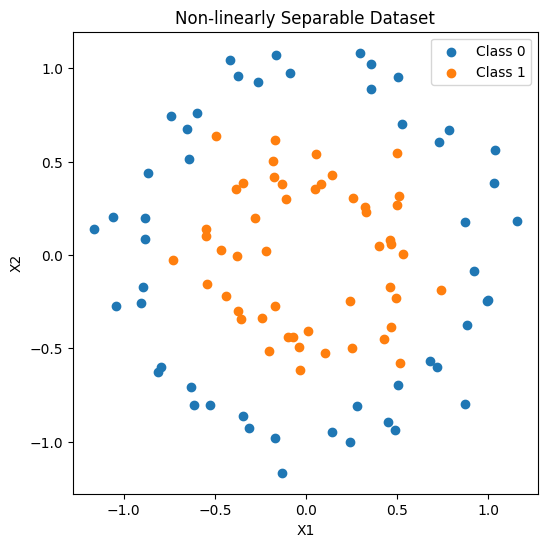

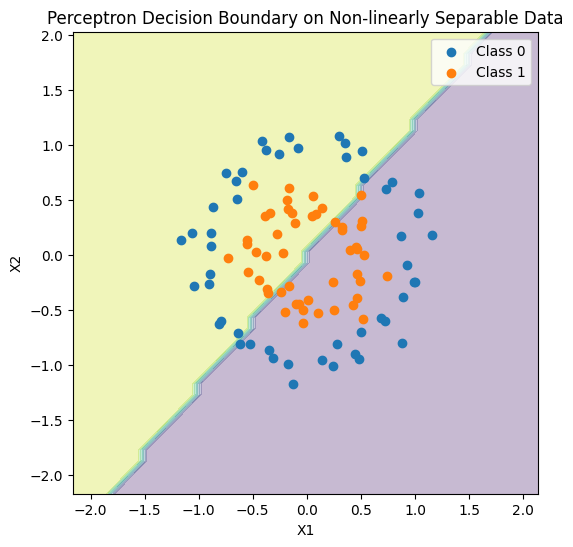

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.linear_model import Perceptron

# Create a toy dataset that is not linearly separable
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

# Plot the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
plt.title('Non-linearly Separable Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Apply the Perceptron algorithm
perceptron = Perceptron(max_iter=1000)
perceptron.fit(X, y)

# Plot the decision boundary of the Perceptron
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
plt.title('Perceptron Decision Boundary on Non-linearly Separable Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


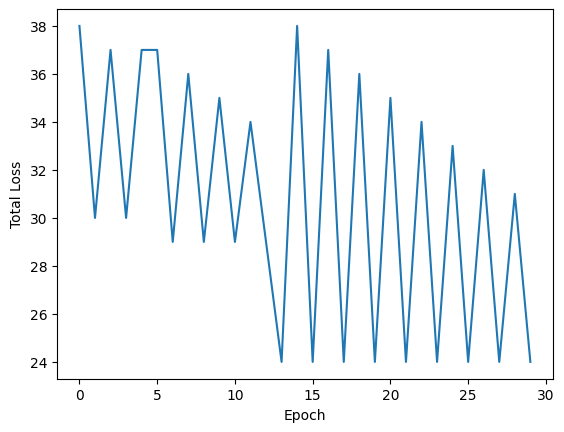

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.